# Gaussian Process Model

#### Training Data
Consider a set of training data consisting of input-output pairs $(X_{\text{train}}, Y_{\text{train}})$, where 
- $X_{\text{train}} = \{x_1, x_2, \ldots, x_n\}$ is a set of $n$ input points.
- $Y_{\text{train}} = \{y_1, y_2, \ldots, y_n\}$ is the corresponding set of $n$ output values.

#### Radial Basis Function (RBF) Kernel
The RBF kernel (also known as the squared exponential kernel) between two points $x$ and $x'$ is defined as:
$$ k(x, x') = \sigma^2 \exp\left(-\frac{||x - x'||^2}{2l^2}\right) $$
where 
- $\sigma^2$ is the variance parameter, controlling the vertical variation.
- $l$ is the length scale parameter, controlling the horizontal variation (the smoothness).

#### Covariance Matrix
The covariance matrix $K$ for the training data $X_{\text{train}}$ is formed by applying the RBF kernel to all pairs of training inputs:
$$ K = \begin{bmatrix}
k(x_1, x_1) & k(x_1, x_2) & \cdots & k(x_1, x_n) \\
k(x_2, x_1) & k(x_2, x_2) & \cdots & k(x_2, x_n) \\
\vdots & \vdots & \ddots & \vdots \\
k(x_n, x_1) & k(x_n, x_2) & \cdots & k(x_n, x_n)
\end{bmatrix} $$

#### Posterior Mean and Variance
Given a set of test inputs $X_{\text{test}} = \{x^*_1, x^*_2, \ldots, x^*_m\}$, the Gaussian Process model predicts the posterior mean and variance for each test input. The posterior mean $\mu^*$ and covariance $K^*$ at the test points are given by:
$$ \mu^* = K^*(X_{\text{train}}, X_{\text{test}}) \cdot K^{-1}(X_{\text{train}}, X_{\text{train}}) \cdot Y_{\text{train}} $$
$$ K^* = K(X_{\text{test}}, X_{\text{test}}) - K^*(X_{\text{train}}, X_{\text{test}}) \cdot K^{-1}(X_{\text{train}}, X_{\text{train}}) \cdot K^*(X_{\text{test}}, X_{\text{train}}) $$
where 
- $K^*(X_{\text{train}}, X_{\text{test}})$ is the covariance matrix between the training inputs and test inputs.
- $K(X_{\text{test}}, X_{\text{test}})$ is the covariance matrix between the test inputs.

#### Noise Model
In practice, a noise term $\sigma_n^2 I$ is often added to the diagonal of $K$ to account for observation noise, where $I$ is the identity matrix and $\sigma_n^2$ is the variance of the noise.

#### Negative Log Marginal Likelihood
The Negative Log Marginal Likelihood (NLML) is used for training the hyperparameters of the Gaussian Process. It is given by:
$$ \text{NLML} = \frac{1}{2} Y_{\text{train}}^T K^{-1} Y_{\text{train}} + \frac{1}{2} \log |K| + \frac{n}{2} \log(2\pi) $$


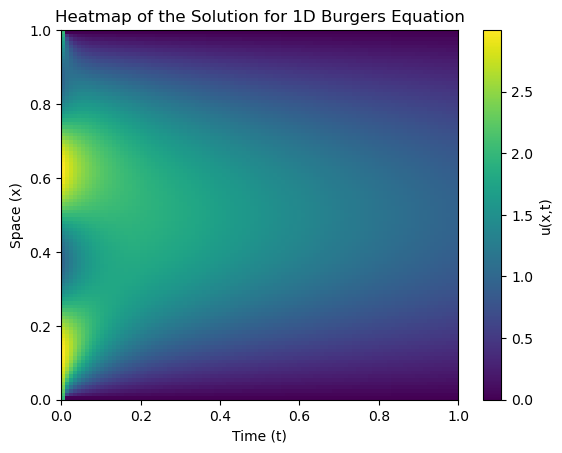

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.  , 0.01, 0.02, 0.03,
        0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14,
        0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25,
        0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
        0.37, 0.38, 0.39, 0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
        0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
        0.19]),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

class Burgers1D:
    def __init__(self, L=1.0, T=1.0, Nx=100, Nt=100, nu=0.1):
        # Parameters
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt
        self.nu = nu

        # Discretization
        self.dx = L / Nx
        self.dt = T / Nt
        self.x = np.linspace(0, L, Nx + 1)
        self.t = np.linspace(0, T, Nt + 1)

        # Initialize the solution matrix
        self.U = np.zeros((Nx + 1, Nt + 1))

    def set_initial_condition(self):
        self.U[:, 0] = np.sin(4 * np.pi * self.x) + 2

    def time_step(self):
        for n in range(1, self.Nt + 1):
            A = np.zeros((self.Nx + 1, self.Nx + 1))
            b = np.zeros(self.Nx + 1)
            for i in range(1, self.Nx):
                A[i, i - 1] = -self.nu * self.dt / self.dx ** 2
                A[i, i] = 1 + 2 * self.nu * self.dt / self.dx ** 2
                A[i, i + 1] = -self.nu * self.dt / self.dx ** 2
                b[i] = self.U[i, n - 1]
            A[0, 0] = A[self.Nx, self.Nx] = 1  # boundary conditions
            self.U[:, n] = solve(A, b)

    def plot_solution(self):
        plt.imshow(self.U, extent=[0, self.T, 0, self.L], origin='lower', aspect='auto')
        plt.colorbar(label='u(x,t)')
        plt.xlabel('Time (t)')
        plt.ylabel('Space (x)')
        plt.title('Heatmap of the Solution for 1D Burgers Equation')
        plt.show()

    def get_solution(self):
        return self.U
    
    def generate_random_data(self, num_points):
        # Randomly select points in the space-time domain
        random_indices = np.random.choice(self.U.size, num_points, replace=False)
        random_points = np.array(np.unravel_index(random_indices, self.U.shape)).T
        random_x = random_points[:, 1] * self.dx
        random_t = random_points[:, 0] * self.dt
        random_u = self.U[tuple(random_points.T)]

        return random_x, random_t, random_u
    
    def generate_test_data(self):
        # Select points in the space-time domain
        test_indices = np.array(np.unravel_index(np.arange(self.U.size), self.U.shape)).T
        test_x = test_indices[:, 1] * self.dx
        test_t = test_indices[:, 0] * self.dt
        test_u = self.U[tuple(test_indices.T)]

        return test_x, test_t, test_u
    
    def generate_collocation_data(self):
        # Select points in the space-time domain
        test_indices = np.array(np.unravel_index(np.arange(100), (40,40))).T
        test_x = test_indices[:, 1] * self.dx
        test_t = test_indices[:, 0] * self.dt
        test_u = self.U[tuple(test_indices.T)]

        return test_x, test_t, test_u

# Usage example
burger = Burgers1D()
burger.set_initial_condition()
burger.time_step()
burger.plot_solution()
burger.generate_random_data(100)
burger.generate_test_data()
burger.generate_collocation_data()


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.optim import Adam
from scipy.interpolate import griddata


class NeuralNetworkMean(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNetworkMean, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)  # Example architecture
        self.relu = nn.Tanh()
        self.fc2 = nn.Linear(1024, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

class GaussianProcess(nn.Module):
    def __init__(self, input_dim, output_dim=1, var=1.0, length_scale=None, noise_var=0.01):
        super(GaussianProcess, self).__init__()
        self.nn_mean = NeuralNetworkMean(input_dim, output_dim)  # Neural network for the mean function
        self.log_var = nn.Parameter(torch.log(torch.tensor([var], dtype=torch.float32)))
        
        # If length_scale is not provided, initialize it as a tensor of ones
        if length_scale is None:
            length_scale = torch.ones(input_dim, dtype=torch.float32)
        self.log_length_scale = nn.Parameter(torch.log(length_scale))
        
        self.log_noise_var = nn.Parameter(torch.log(torch.tensor([noise_var], dtype=torch.float32)))
        self.X_train = None
        self.y_train = None

    def rbf_kernel(self, X1, X2):
        # Ensure input shapes match
        assert X1.shape[1] == X2.shape[1], "X1 and X2 must have the same number of features"
        
        # Pairwise squared differences for each dimension
        diff = (X1.unsqueeze(1) - X2.unsqueeze(0)).pow(2)
        
        # Length scales for each dimension
        length_scales = torch.exp(self.log_length_scale)
        
        # Apply length scales to the squared differences
        weighted_sq_diff = diff / length_scales.pow(2)
        
        # Sum over the dimensions and negate
        neg_weighted_sq_diff_sum = -0.5 * weighted_sq_diff.sum(-1)
        
        # Compute the kernel matrix
        variance = torch.exp(self.log_var)
        return variance * torch.exp(neg_weighted_sq_diff_sum)

    def nlml(self, X, y):
        # Adjust y by subtracting the neural network's mean prediction
        y_adjusted = y - self.nn_mean(X)
        # Validate input shapes
        assert X.ndim == 2 and y_adjusted.ndim == 2, "X and y must be 2D tensors"
        assert X.size(0) == y_adjusted.size(0), "Number of samples in X and y must match"
        K = self.rbf_kernel(X, X) + torch.exp(self.log_noise_var) * torch.eye(X.size(0))
        L = torch.linalg.cholesky(K + 1e-6 * torch.eye(K.size(0)))
        inv_y = torch.cholesky_solve(y_adjusted, L)
        logdet = 2 * torch.sum(torch.log(torch.diag(L)))
        return 0.5 * y_adjusted.t().mm(inv_y) + 0.5 * logdet + 0.5 * X.size(0) * torch.log(torch.tensor(2 * np.pi))


    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Use the stored training data to make predictions on the test data
        return self._predict(self.X_train, self.y_train, X_test)
    
    def _predict(self, X_train, y_train, X_test):
        # Adjust y_train by subtracting the neural network's mean prediction
        y_train_adjusted = y_train - self.nn_mean(X_train)

        # Calculate kernel matrices
        K = self.rbf_kernel(X_train, X_train) + torch.exp(self.log_noise_var) * torch.eye(X_train.size(0))
        K_s = self.rbf_kernel(X_train, X_test)
        K_ss = self.rbf_kernel(X_test, X_test) + 1e-8 * torch.eye(X_test.size(0))  # Add jitter for stability

        # Cholesky decomposition
        L = torch.linalg.cholesky(K + 1e-6 * torch.eye(K.size(0)))

        # Compute the mean at our test points
        Lk = torch.linalg.solve(L, K_s)
        mu = torch.matmul(Lk.t(), torch.linalg.solve(L, y_train_adjusted)).squeeze(-1)

        # Compute the variance at our test points
        variance = torch.diag(K_ss) - torch.sum(Lk ** 2, axis=0)

        # Add the neural network's mean prediction to the GP's mean
        nn_mean_test = self.nn_mean(X_test)
        mu += nn_mean_test.squeeze(-1)

        return mu, variance

    def compute_gradient(self, X):
        """
        Compute the gradient (u_x, u_t) and second spatial derivative (u_xx) of the GP's predictive mean 
        with respect to the inputs X (space and time).

        Parameters:
        X (torch.Tensor): Input tensor for which gradients are to be computed. Must require grad.

        Returns:
        torch.Tensor: Gradients (u_x, u_t) and second derivative u_xx of the predictive mean w.r.t. the input X.
        """
        # Ensure that X requires gradient
        X.requires_grad_(True)

        # Predict the mean at the input points
        mean, _ = self.predict(X)

        # Compute the gradient of the mean w.r.t. X (first derivatives)
        gradients = torch.autograd.grad(outputs=mean, inputs=X, grad_outputs=torch.ones_like(mean), create_graph=True)[0]

        # Compute u_x and u_t (assuming the first column of X is space and the second is time)
        u_x = gradients[:, 0]
        u_t = gradients[:, 1]

        # Compute the second derivative w.r.t. space (u_xx)
        # Use allow_unused=True to handle cases where u_x does not depend on X in the required way
        u_xx = torch.autograd.grad(outputs=u_x, inputs=X[:, 0], grad_outputs=torch.ones_like(u_x), create_graph=True, allow_unused=True)[0]

        # Handle cases where u_xx is None (if u_x is independent of X)
        if u_xx is None:
            u_xx = torch.zeros_like(u_x)

        return u_x, u_t, u_xx





import matplotlib.pyplot as plt
import numpy as np

def plot_gp(model, x_test, burger):
    model.eval()  # Set model to evaluation mode

    # Predict with GP model
    mu, _ = model.predict(x_test)

    # Reshape the GP predictions for plotting
    num_points_per_dim = int(np.sqrt(mu.size(0)))
    gp_pred_reshaped = mu.reshape(num_points_per_dim, num_points_per_dim).detach().numpy()

    # Create the heatmap for GP prediction
    plt.figure(figsize=(6, 5))
    plt.imshow(gp_pred_reshaped, extent=(0, burger.L, 0, burger.T), origin='lower')
    plt.colorbar()
    plt.title('GP Prediction')
    plt.xlabel('Space')
    plt.ylabel('Time')
    plt.show()



def interpolate_true_data(burger_solution, x_test):
    # Placeholder for the interpolation logic
    # This needs to be implemented based on the structure of burger_solution and x_test
    # For example, using scipy.interpolate.griddata
    return np.random.rand(20, 20)  # Replace this with actual interpolation


from scipy.interpolate import griddata

def plot_1d_slices(gp_model, burger, x1_values, x2_range, uncertainty=1.96):
    """
    Plot 1D slices of the GP posterior mean, lower and upper confidence bounds, and true function.

    Parameters:
    gp_model (GaussianProcess): Trained Gaussian Process model.
    burger (Burgers1D): Instance of the Burgers1D class, containing the true solution.
    x1_values (list): Values of x1 at which to take the 1D slices.
    x2_range (torch.Tensor): Range of x2 values for plotting.
    uncertainty (float): The z-score for the desired confidence interval (default is 95% confidence).
    """
    # Create a grid for interpolation from the Burgers' solution
    grid_x, grid_t = np.meshgrid(np.linspace(0, burger.L, burger.Nx+1), 
                                 np.linspace(0, burger.T, burger.Nt+1))
    points = np.column_stack((grid_x.ravel(), grid_t.ravel()))
    values = burger.U.ravel()

    for x1 in x1_values:
        # Generate test points for the slice
        x_test = torch.tensor([[x1, x2] for x2 in x2_range])

        # Get the posterior mean and variance
        mu, var = gp_model.predict(x_test)

        # Compute the lower and upper confidence bounds
        lower = mu - uncertainty * torch.sqrt(var)
        upper = mu + uncertainty * torch.sqrt(var)
        
        # Interpolate the true values from the Burgers' solution
        true_values = griddata(points, values, x_test.numpy(), method='cubic')

        # Plot
        plt.figure(figsize=(8, 6))
        plt.plot(x2_range, mu.detach().numpy(), label='Posterior Mean')
        plt.fill_between(x2_range, lower.detach().numpy(), upper.detach().numpy(), alpha=0.2, label='Confidence Interval')
        plt.plot(x2_range, true_values, label='True Function', linestyle='--')
        plt.xlabel('$x_2$')
        plt.ylabel('Function Value')
        plt.title(f'1D Slice along $x_1 = {x1}$')
        plt.legend()
        plt.show()


Epoch 1/10000, Loss: 67.28119659423828, NLML: 67.28119659423828, MSE: 35.7539176940918
Epoch 101/10000, Loss: 13.670753479003906, NLML: 13.670753479003906, MSE: 53.016845703125
Epoch 201/10000, Loss: -8.243446350097656, NLML: -8.243446350097656, MSE: 70.97901153564453
Epoch 301/10000, Loss: -21.519493103027344, NLML: -21.519493103027344, MSE: 95.73806762695312
Epoch 401/10000, Loss: -29.71643829345703, NLML: -29.71643829345703, MSE: 150.35513305664062
Epoch 501/10000, Loss: -34.79731750488281, NLML: -34.79731750488281, MSE: 175.03123474121094
Epoch 601/10000, Loss: -39.92967987060547, NLML: -39.92967987060547, MSE: 182.4572296142578
Epoch 701/10000, Loss: -44.628517150878906, NLML: -44.628517150878906, MSE: 229.03822326660156
Epoch 801/10000, Loss: -48.68628692626953, NLML: -48.68628692626953, MSE: 424.4748840332031
Epoch 901/10000, Loss: -52.816612243652344, NLML: -52.816612243652344, MSE: 882.9857177734375
Epoch 1001/10000, Loss: -57.445838928222656, NLML: -57.445838928222656, MSE: 1

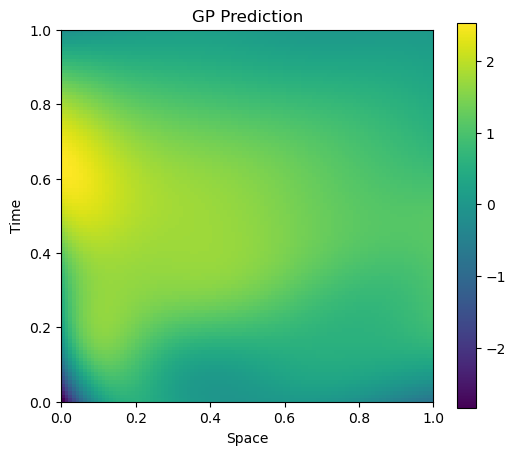

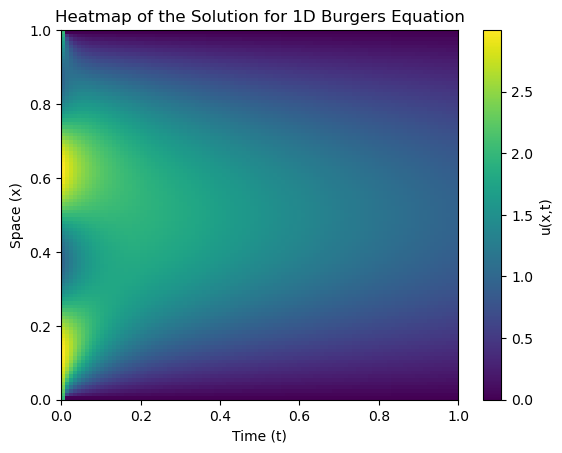

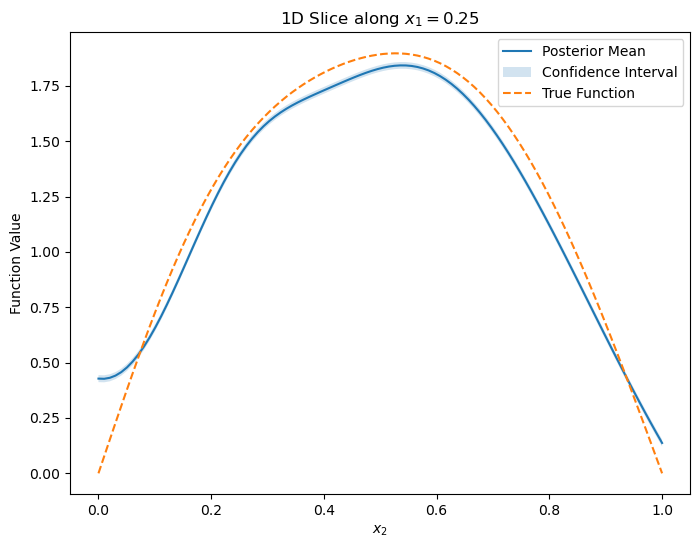

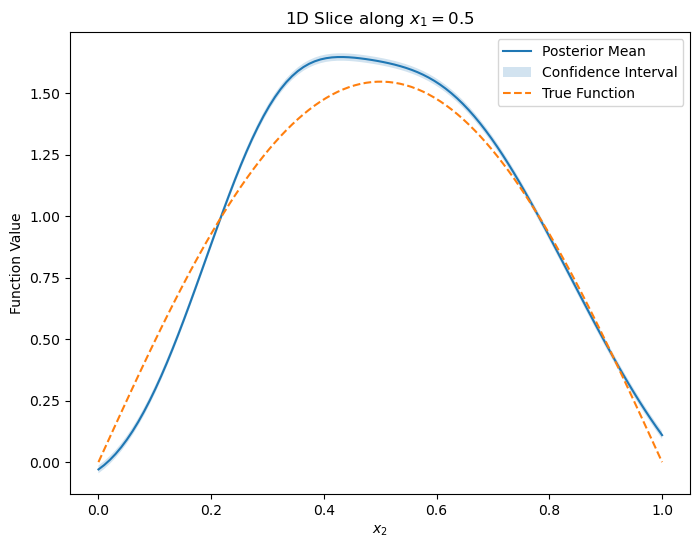

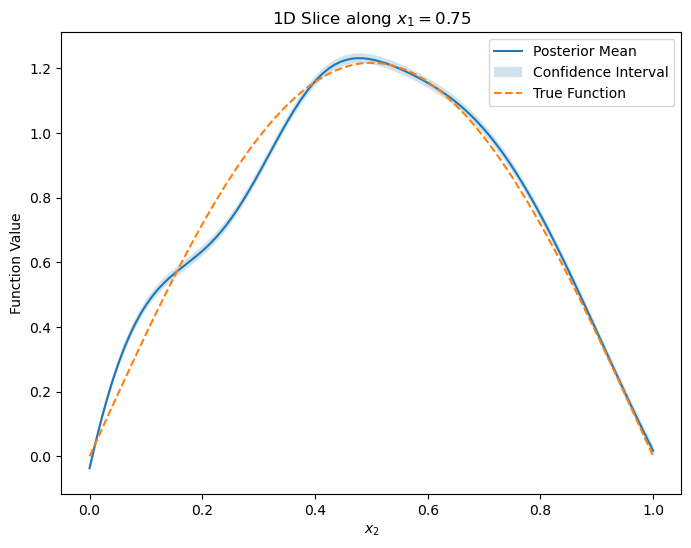

In [7]:
# Set the random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Instantiate and solve the Burgers equation
burger = Burgers1D()
burger.set_initial_condition()
burger.time_step()

# Generate training data
N = 100  # Number of training points
x, t, u = burger.generate_random_data(N)
x_train = torch.tensor(np.column_stack((x, t)), dtype=torch.float32)
y_train = torch.tensor(u, dtype=torch.float32).unsqueeze(1)  # Ensure y_train is a 2D tensor

# Add noise to the training data
noise_var = 0.01
y_train += torch.randn(y_train.shape) * torch.sqrt(torch.tensor(noise_var))

# Create test data similarly
# Note: You might want to generate test data differently based on your use case
x_test, t_test, u_test = burger.generate_test_data()
x_test = torch.tensor(np.column_stack((x_test, t_test)), dtype=torch.float32)

# Create collocation data
x_colocation, t_colocation, u_colocation = burger.generate_collocation_data()
x_colocation = torch.tensor(np.column_stack((x_colocation, t_colocation)), dtype=torch.float32)

# Instantiate the model
input_dim = 2  # For 2D inputs (space and time)
gp_model = GaussianProcess(input_dim)  # Assuming GaussianProcess is defined



# Fit the model with training data
gp_model.fit(x_train, y_train)

# Training settings
learning_rate = 0.001
alpha = 1
epochs = 10000
optimizer = Adam(gp_model.parameters(), lr=learning_rate)

# Initialize lists to store loss values
total_loss_values = []
nlml_loss_values = []
mse_loss_values = []

# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero gradients

    # Compute NLML loss
    nlml_loss = gp_model.nlml(x_train, y_train)

    # Compute the predicted mean and gradients
    u_x, u_t, u_xx = gp_model.compute_gradient(x_colocation)  # x_colocation points where PDE is enforced

    # Compute residual of the Burgers' equation
    residual = u_t + u_x**2 - burger.nu * u_xx  # Adjusted residual calculation

    # MSE loss for the residual
    mse_loss = torch.mean(residual ** 2)

    # Total loss
    loss = nlml_loss #+ alpha * mse_loss
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters

    # Store losses for plotting
    total_loss_values.append(loss.item())
    nlml_loss_values.append(nlml_loss.item())
    mse_loss_values.append(mse_loss.item())

    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, NLML: {nlml_loss.item()}, MSE: {mse_loss.item()}')

plot_gp(gp_model, x_test, burger)
burger.plot_solution()


# Example usage
x1_values = [0.25, 0.5, 0.75]  # Example x1 values within the domain of the Burgers' equation
x2_range = torch.linspace(0, burger.T, 100)
plot_1d_slices(gp_model, burger, x1_values, x2_range)

Epoch 1/10000, Loss: 103.03511047363281, NLML: 67.28119659423828, MSE: 35.7539176940918
Epoch 101/10000, Loss: 55.9625358581543, NLML: 16.894248962402344, MSE: 39.06828689575195
Epoch 201/10000, Loss: 27.627140045166016, NLML: -5.5694580078125, MSE: 33.196598052978516
Epoch 301/10000, Loss: 3.4335269927978516, NLML: -18.722122192382812, MSE: 22.155649185180664
Epoch 401/10000, Loss: -13.10422420501709, NLML: -26.814598083496094, MSE: 13.710373878479004
Epoch 501/10000, Loss: -23.141983032226562, NLML: -32.53889465332031, MSE: 9.396912574768066
Epoch 601/10000, Loss: -29.43325424194336, NLML: -36.696800231933594, MSE: 7.263545036315918
Epoch 701/10000, Loss: -33.880889892578125, NLML: -39.541908264160156, MSE: 5.661019325256348
Epoch 801/10000, Loss: -37.417808532714844, NLML: -42.295143127441406, MSE: 4.87733268737793
Epoch 901/10000, Loss: -41.08159637451172, NLML: -45.63880157470703, MSE: 4.557204246520996
Epoch 1001/10000, Loss: -44.879817962646484, NLML: -49.12201690673828, MSE: 4.

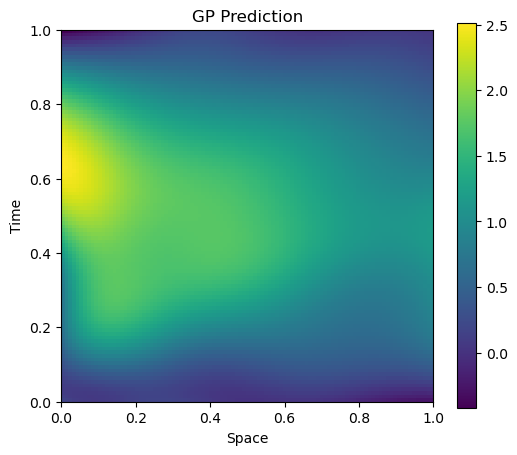

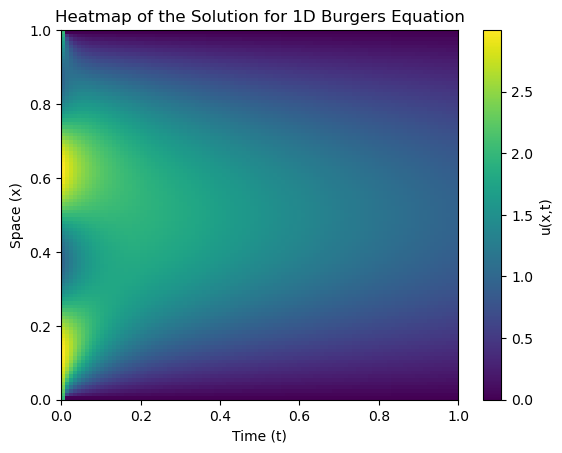

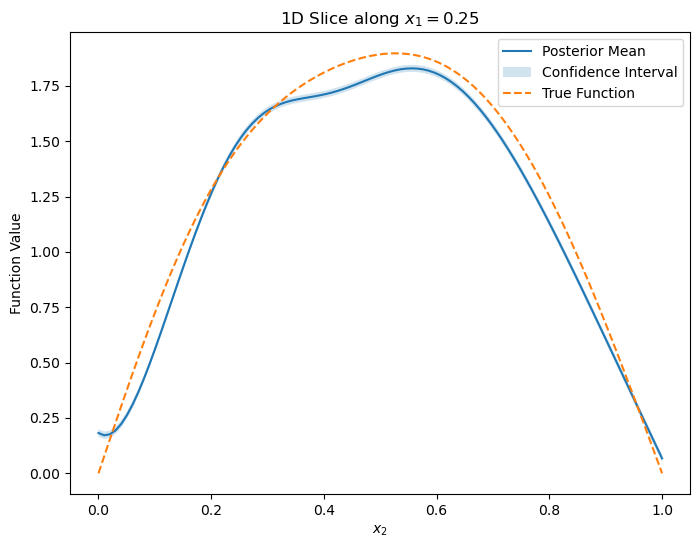

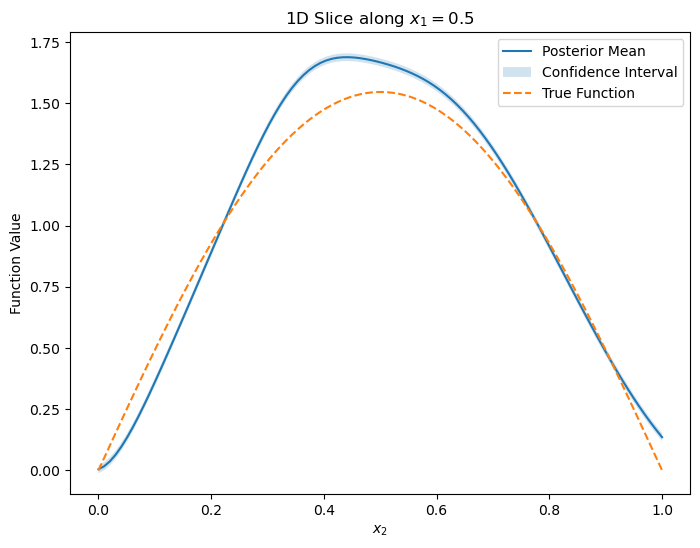

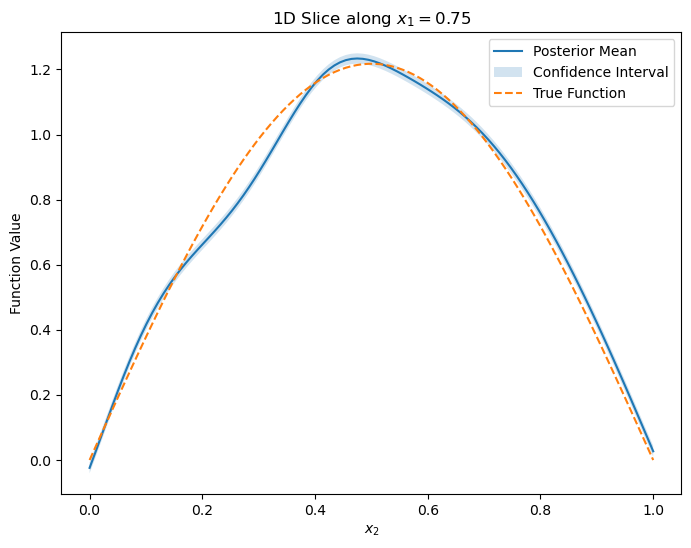

In [8]:
# Set the random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Instantiate and solve the Burgers equation
burger = Burgers1D()
burger.set_initial_condition()
burger.time_step()

# Generate training data
N = 100  # Number of training points
x, t, u = burger.generate_random_data(N)
x_train = torch.tensor(np.column_stack((x, t)), dtype=torch.float32)
y_train = torch.tensor(u, dtype=torch.float32).unsqueeze(1)  # Ensure y_train is a 2D tensor

# Add noise to the training data
noise_var = 0.01
y_train += torch.randn(y_train.shape) * torch.sqrt(torch.tensor(noise_var))

# Create test data similarly
# Note: You might want to generate test data differently based on your use case
x_test, t_test, u_test = burger.generate_test_data()
x_test = torch.tensor(np.column_stack((x_test, t_test)), dtype=torch.float32)

# Create collocation data
x_colocation, t_colocation, u_colocation = burger.generate_collocation_data()
x_colocation = torch.tensor(np.column_stack((x_colocation, t_colocation)), dtype=torch.float32)

# Instantiate the model
input_dim = 2  # For 2D inputs (space and time)
gp_model = GaussianProcess(input_dim)  # Assuming GaussianProcess is defined



# Fit the model with training data
gp_model.fit(x_train, y_train)

# Training settings
learning_rate = 0.001
alpha = 1
epochs = 10000
optimizer = Adam(gp_model.parameters(), lr=learning_rate)

# Initialize lists to store loss values
total_loss_values = []
nlml_loss_values = []
mse_loss_values = []

# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero gradients

    # Compute NLML loss
    nlml_loss = gp_model.nlml(x_train, y_train)

    # Compute the predicted mean and gradients
    u_x, u_t, u_xx = gp_model.compute_gradient(x_colocation)  # x_colocation points where PDE is enforced

    # Compute residual of the Burgers' equation
    residual = u_t + u_x**2 - burger.nu * u_xx  # Adjusted residual calculation

    # MSE loss for the residual
    mse_loss = torch.mean(residual ** 2)

    # Total loss
    loss = nlml_loss + alpha * mse_loss
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters

    # Store losses for plotting
    total_loss_values.append(loss.item())
    nlml_loss_values.append(nlml_loss.item())
    mse_loss_values.append(mse_loss.item())

    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, NLML: {nlml_loss.item()}, MSE: {mse_loss.item()}')

plot_gp(gp_model, x_test, burger)
burger.plot_solution()



# Example usage
x1_values = [0.25, 0.5, 0.75]  # Example x1 values within the domain of the Burgers' equation
x2_range = torch.linspace(0, burger.T, 100)
plot_1d_slices(gp_model, burger, x1_values, x2_range)

### Enforcing Derivative Matching in Gaussian Process

#### Overview
In addition to minimizing the Negative Log Marginal Likelihood (NLML), the training of the Gaussian Process (GP) model can be augmented by enforcing that the derivative of the GP's posterior mean matches the derivative of the true solution. This approach can be particularly beneficial in problems where the derivatives of the function are as important as the function values themselves, such as in differential equations or gradient-based optimization tasks.

#### Derivative Matching
Let $ X_{\text{colocation}} = \{x^c_1, x^c_2, \ldots, x^c_m\} $ be a set of colocation points where the derivatives are evaluated. The objective is to match the derivatives of the GP's posterior mean at these points with the derivatives of the true solution.

If $ f(x) $ represents the true solution, then its derivative at a colocation point $ x^c $ is given by $ f'(x^c) $. Similarly, the derivative of the GP's posterior mean at $ x^c $ is denoted as $ \mu'(x^c) $.

#### Residual Loss
The residual loss is computed as the mean squared error (MSE) between the predicted derivatives and the true derivatives:
$$ \text{MSE Loss} = \frac{1}{m} \sum_{i=1}^{m} \left( \mu'(x^c_i) - f'(x^c_i) \right)^2 $$

#### Total Loss Function
The total loss function is a weighted sum of the NLML and the MSE loss of the derivatives:
$$ \text{Total Loss} = \text{NLML} + \alpha \cdot \text{MSE Loss} $$
where:
- $\alpha$ is a weighting factor that balances the importance of the NLML and the MSE loss.

#### Training Objective
During training, both the NLML and the MSE loss are minimized simultaneously. This leads to a GP model that not only fits the training data well (as measured by NLML) but also aligns its predictive derivatives with those of the true function (as measured by the MSE loss of derivatives).

#### Implementation in Training Loop
In the training loop, the `compute_gradient` method of the GP model is used to compute $ \mu'(X_{\text{colocation}}) $, and the true derivatives $ f'(X_{\text{colocation}}) $ are obtained using a predefined function. The total loss is then computed as the sum of the NLML and the weighted MSE loss of derivatives, which is used for backpropagation and optimization.
